# 🪃 **Práctica 07: Regresión Logística** 📟
----

## <b>T</b><b>e</b><b>a</b><b>m</b>: <font color='red'><b>S</b></font><b>ocios</b> <font color='blue'><b>I</b></font><b>nteligentemente</b> <font color='green'><b>A</b></font><b>rtificiales</b> (<font color='red'><b>S</b></font>.<font color='blue'><b>I</b></font>.<font color='green'><b>A</b></font>)

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

<font color='green'>♣</font> **Navarro Santana Pablo César**

In [42]:
# En caso de no tener instalado lo anterior, instalar con:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install -U scikit-learn

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn as sk
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

%matplotlib inline

### **Cargamos los datos**

In [44]:
path = './data/cd_Abandono_Escolar_CONALEP_2023.csv'

### **Leemos los datos del CSV**

In [45]:
# Leemos el archivo
pd.read_csv(path, encoding='latin-1')

,cve_ent,entidad,cve_plantel,plantel,periodo_anual,Porcentaje_de_abandono_escolar
0,1.0,Aguascalientes,63.0,Aguascalientes II,2022-2023,8.5
1,1.0,Aguascalientes,284.0,Aguascalientes III,2022-2023,13.9
2,1.0,Aguascalientes,318.0,Aguascalientes IV,2022-2023,9.1
3,1.0,Aguascalientes,247.0,Ing. Miguel Ángel Barberena Vega,2022-2023,9.1
4,1.0,Aguascalientes,319.0,Pabellon de Arteaga,2022-2023,12.6
...,...,...,...,...,...,...
310,32.0,Zacatecas,137.0,Fresnillo,2022-2023,23.2
311,32.0,Zacatecas,136.0,Maestra Dolores Castro Varela,2022-2023,14.3
312,32.0,Zacatecas,326.0,Mazapil,2022-2023,21.0
313,NaN,NaN,NaN,NaN,NaN,NaN


### **Creamos un Data Frame del CSV**

In [46]:
escolar_DataFrame = pd.read_csv(path, encoding='latin-1')

### **Obtenemos los tipos de Datos del CSV**

In [47]:
escolar_DataFrame.dtypes

cve_ent                           float64
entidad                            object
cve_plantel                       float64
plantel                            object
periodo_anual                      object
Porcentaje_de_abandono_escolar    float64
dtype: object

### **Visualizamos las columnas del CSV**

In [48]:
escolar_DataFrame.columns

Index(['cve_ent', 'entidad', 'cve_plantel', 'plantel', 'periodo_anual',
       'Porcentaje_de_abandono_escolar'],
      dtype='object')

### **Ejemplo de la obtencion de Datos de alguna de las columnas del CSV**

In [49]:
# Probamos nuestro ejemplo con la columna 'entidad'
pd.unique(escolar_DataFrame['entidad'])

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro de Arteaga', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz Llave', 'Yucatán', 'Zacatecas', nan, 'CONALEP'],
      dtype=object)

In [50]:
# Probamos otro ejemplo con la columna 'Porcentaje_de_abandono_escolar'
pd.unique(escolar_DataFrame['Porcentaje_de_abandono_escolar'])

array([ 8.5, 13.9,  9.1, 12.6, 17.6, 10. , 20.2, 22.6, 19. , 20. , 12.5,
       18.7, 20.5,  8.6, 18.8, 11.4, 17.5, 12.2, 15.6, 12.8, 18.9, 10.9,
       30.9, 16.2, 23.1, 20.9, 25.4, 29.2, 17.4, 31.7, 20.1, 15. , 19.9,
       21.1, 17. , 23. , 32.3, 23.3, 28.4, 25.3, 36.9, 27.8, 37.4, 24. ,
       30.6, 19.7, 18.3, 25.6, 21.3, 29.9, 19.6, 25.9, 28.7, 21.6, 27.4,
        7.3,  7.1,  9.5,  8.3,  5.3, 10.6,  7.5, 14.5,  8.7, 15.1, 24.9,
       26.5, 31.4, 11.9, 15.3, 14.7,  9.4, 12.1,  9.9,  7.7, 13.8, 16.6,
       10.7, 13.5, 13.6, 12.7, 11.2, 11.8, 13.3, 10.2, 14.2, 24.6, 16.5,
       20.3, 15.7, 29.7,  8.4, 14. , 11.5, 11.7, 13. ,  9.2, 19.2, 10.3,
        6.9,  7.2,  7.9, 11.1, 11. ,  9.8, 10.1, 12.9, 10.4,  9.3,  5.2,
        4.8, 10.8,  5.4, 18.2,  7. ,  7.4, 13.7,  9.7,  6.3, 14.6, 17.2,
       22.8, 23.2, 15.8, 21.9, 18.6, 15.9, 17.8, 15.2, 22.4, 20.7, 18.4,
       14.4,  8.8, 14.3, 22.1, 16.9,  4.2, 14.9,  4.5,  6.6, 16. ,  6.5,
        8. , 19.3, 13.4,  8.9,  3.6, 10.5, 14.1, 25

### **Visualizamos el numero de planteles de Conalep en cada entidad**

In [51]:
escolar_DataFrame['entidad'].value_counts()

entidad
México                  39
Ciudad de México        27
Nuevo León              18
Jalisco                 18
Sinaloa                 16
Guanajuato              16
Veracruz Llave          15
Sonora                  14
Michoacán de Ocampo     13
Chiapas                 12
Guerrero                10
Puebla                  10
Coahuila de Zaragoza     9
Chihuahua                8
Tamaulipas               8
Quintana Roo             8
Aguascalientes           7
Tabasco                  7
Baja California          6
Hidalgo                  6
Yucatán                  5
San Luis Potosí          5
Morelos                  5
Querétaro de Arteaga     5
Oaxaca                   5
Nayarit                  4
Durango                  3
Colima                   3
Tlaxcala                 3
Campeche                 3
Zacatecas                3
Baja California Sur      2
CONALEP                  1
Name: count, dtype: int64

### **Obtenemos mas informacion con describe**

In [52]:
escolar_DataFrame['entidad'].describe()

count        314
unique        33
top       México
freq          39
Name: entidad, dtype: object

## **Visualización y análisis de datos**

Text(0, 0.5, 'Porcentaje de Abandono Escolar')

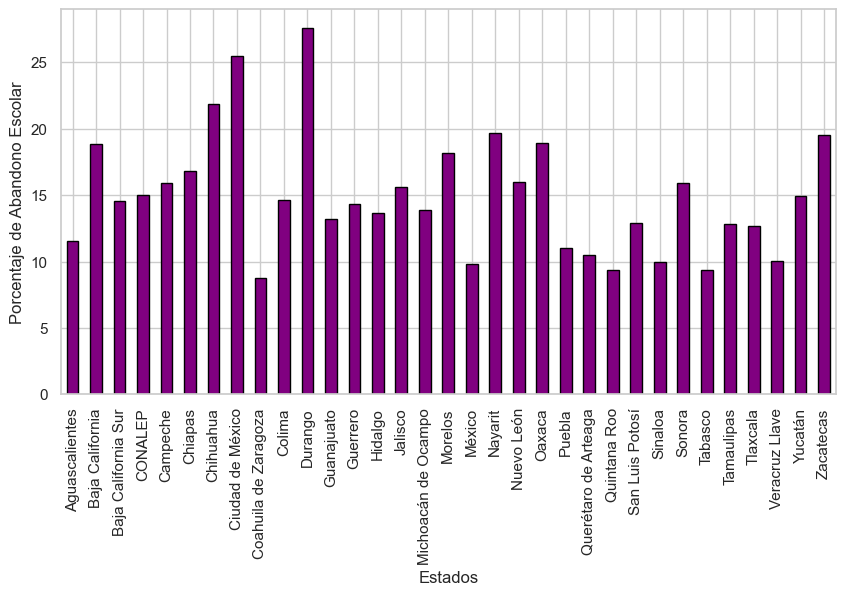

In [77]:
# obtiene el porcentaje de abandono por estado 
porcentaje_por_estado = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()

# grafica con Matplotlib
porcentaje_por_estado.plot(kind='bar', figsize=(10, 5), color='purple', edgecolor='black') #cambien colores si gustas :O

# añade los titulos en la grafica
plt.xlabel('Estados')
plt.ylabel('Porcentaje de Abandono Escolar')

### **Visualizamos las entidades y su indice de abandono**

<Axes: xlabel='entidad', ylabel='Indice de Abandono'>

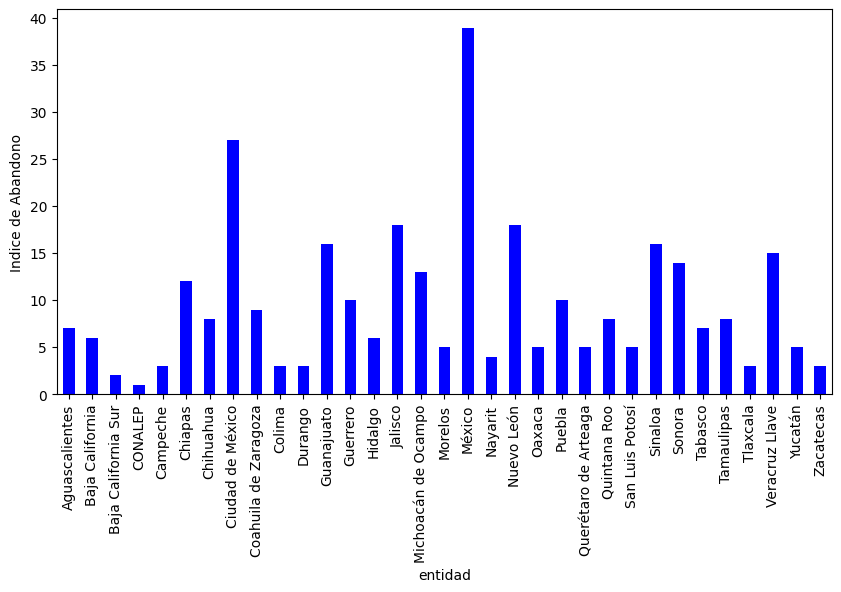

In [ ]:
# Contamos el indice de abandono escolar por entidad
conteo_Entidades_IndiceA = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].count() 

# Graficamos Usando Matplotlib
conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' ) 

### **Agrupamiento de Datos**

In [ ]:
# Agrupamos los datos, primero por entidad y luego por plantel, calculando el promedio de abondono escolar por entidad.
#conteo_Entidades_IndiceA = escolar_DataFrame.groupby(['entidad', 'plantel'])['Porcentaje_de_abandono_escolar'].mean()

# Graficamos Usando Matplotlib
#conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' )

### **Visualizacion de el abandono escolar**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Aguascalientes'),
  Text(1, 0, 'Baja California'),
  Text(2, 0, 'Baja California Sur'),
  Text(3, 0, 'Campeche'),
  Text(4, 0, 'Chiapas'),
  Text(5, 0, 'Chihuahua'),
  Text(6, 0, 'Ciudad de México'),
  Text(7, 0, 'Coahuila de Zaragoza'),
  Text(8, 0, 'Colima'),
  Text(9, 0, 'Durango'),
  Text(10, 0, 'Guanajuato'),
  Text(11, 0, 'Guerrero'),
  Text(12, 0, 'Hidalgo'),
  Text(13, 0, 'Jalisco'),
  Text(14, 0, 'México'),
  Text(15, 0, 'Michoacán de Ocampo'),
  Text(16, 0, 'Morelos'),
  Text(17, 0, 'Nayarit'),
  Text(18, 0, 'Nuevo León'),
  Text(19, 0, 'Oaxaca'),
  Text(20, 0, 'Puebla'),
  Text(21, 0, 'Querétaro de Arteaga'),
  Text(22, 0, 'Quintana Roo'),
  Text(23, 0, 'San Luis Potosí'),
  Text(24, 0, 'Sinaloa'),
  Text(25, 0, 'Sonora'),
  Text(26, 0, 'Tabasco'),
  Text(27, 0, 'Tamaulipas')

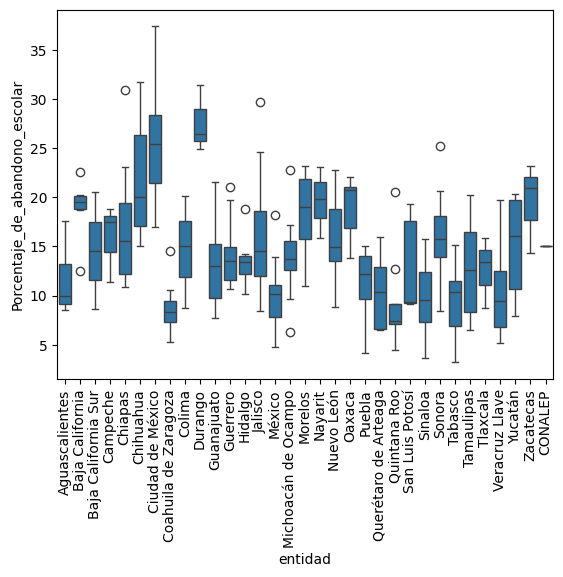

In [ ]:
sns.boxplot(x='entidad', y='Porcentaje_de_abandono_escolar', data=escolar_DataFrame)

# Imprimimos en vertical y no en horizontal las etiquetas de las entidades
plt.xticks(rotation=90)


#conteo_Entidades_IndiceA = escolar_DataFrame.groupby('entidad')['Porcentaje_de_abandono_escolar'].mean()
#conteo_Entidades_IndiceA.plot(kind='bar', figsize=(10, 5), color='blue', ylabel='Indice de Abandono' )


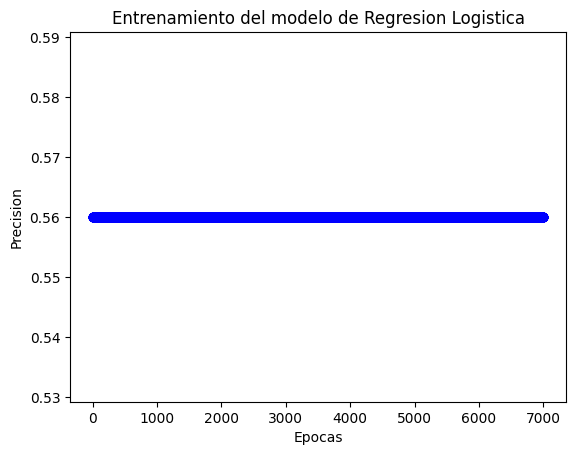

Predicciones:  ['alto' 'alto' 'alto' 'bajo' 'alto' 'bajo' 'alto' 'bajo' 'alto' 'alto'
 'bajo' 'alto' 'bajo' 'alto' 'alto' 'alto' 'alto' 'alto' 'bajo' 'alto'
 'alto' 'bajo' 'bajo' 'alto' 'bajo' 'bajo' 'bajo' 'alto' 'alto' 'alto'
 'bajo' 'alto' 'alto' 'bajo' 'bajo' 'alto' 'bajo' 'alto' 'bajo' 'alto'
 'alto' 'alto' 'alto' 'bajo' 'bajo' 'bajo' 'alto' 'bajo' 'alto' 'bajo'
 'bajo' 'alto' 'bajo' 'alto' 'bajo' 'alto' 'alto' 'bajo' 'bajo' 'alto'
 'bajo' 'bajo' 'alto']
Valores reales:  ['alto', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'bajo', 'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'bajo', 'alto', 'alto', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'alto', 'alto', 'bajo', 'alto', 'bajo', 'alto', 'bajo', 'bajo', 'bajo', 'bajo', 'alto', 'alto', 'alto', 'alto', 'bajo', 'bajo', 'alto', 'bajo']
F1 Score:  0.5

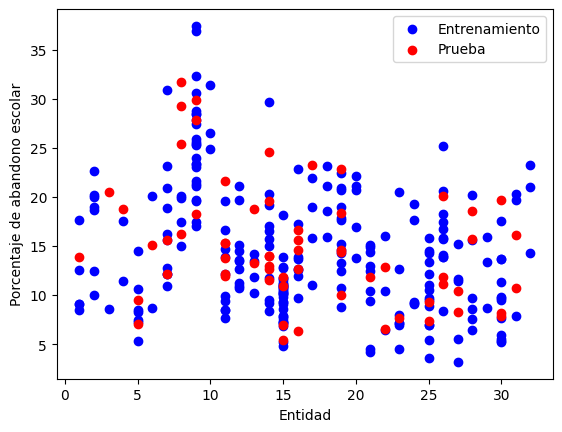

Matriz de confusion: 
[[21 14]
 [14 14]]
Precision:  0.5555555555555556


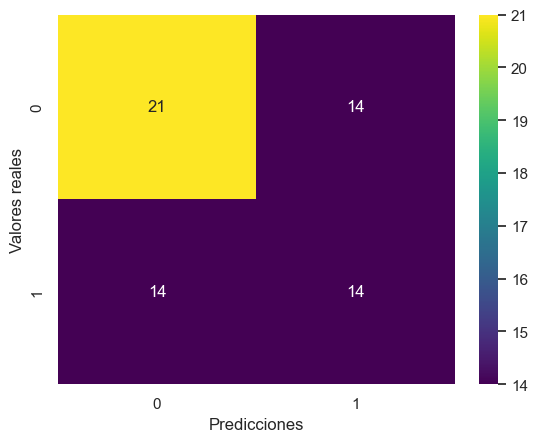

(array([[21, 14],
        [14, 14]], dtype=int64),
 0.5555555555555556)

In [ ]:
def read_data(path):
    '''
    Funcion para leer los datos, obtener su formato correcto y dividirlos en entrenamiento y prueba.
    '''
    # Leemos el archivo
    data = pd.read_csv(path, encoding='latin-1')
    
    # Normalizamos los datos
    # data = (data - data.mean()) / data.std()

    # Eliminamos las filas que tangan valores nulos
    data = data.dropna()

    # Dividimos los datos en entrenamiento y prueba
    # train_data, test_data = train_test_split(data, test_size=0.2)
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=60) 
    return train_data, test_data

'''
def train_model(train_data):
    # Definimos las variables independientes 		
    # X = train_data[['entidad', 'plantel', 'periodo_anual']]
    X = train_data[['cve_ent', 'cve_plantel']]
    # Definimos la variable dependiente
    y = train_data['Porcentaje_de_abandono_escolar']
    # Creamos una instancia del modelo de regresion logistica
    model = sk.linear_model.LinearRegression()
    # Entrenamos el modelo 
    model.fit(X, y)
    return model
'''

def train_model(train_data, epochs=1):
    X = train_data[['cve_ent', 'cve_plantel']]
    y = train_data['Porcentaje_de_abandono_escolar']
    y = ['alto' if i > 13 else 'bajo' for i in y]  

    model = sk.linear_model.LogisticRegression(max_iter=epochs)

    precisiones = []  
    #precisiones2 = []
    for epoch in range(epochs):
        # Calcular y guardar la precisión actual
        model.fit(X, y)
        y_pred = model.predict(X)
        #y_pred2 = model.predict_proba(X)

        precision = sk.metrics.accuracy_score(y, y_pred)
        #precision2 = sk.metrics.accuracy_score(y, y_pred)
        precisiones.append(precision)
        #precisiones2.append(precision2)

    plt.plot(range(1, epochs + 1), precisiones, marker='o', color='blue')
    #plt.plot(range(1, epochs + 1), precisiones2, marker='o', color='red')
    plt.xlabel('Epocas')
    plt.ylabel('Precision')
    plt.title('Entrenamiento del modelo de Regresion Logistica')

    plt.show()

    return model


'''
def evaluate_model(model, test_data):

    # Definimos las variables independientes
    #X = test_data[['entidad', 'plantel', 'periodo_anual']]
    X = train_data[['cve_ent', 'cve_plantel']]
    # Definimos la variable dependiente
    y = test_data['Porcentaje_de_abandono_escolar']
    # Realizamos predicciones sobre el conjunto de prueba
    y_pred = model.predict(X)
    # Revisamos las predicciones y comparamoslas con los valores reales
    print('Predicciones: ', y_pred)
    print('Valores reales: ', y)

    return y_pred, y
'''

def evaluate_model(model, test_data):
    '''
    Funcion para evaluar el modelo de regresion logistica.
    '''
    # Definimos las variables independientes
    X = test_data[['cve_ent', 'cve_plantel']]

    # Definimos la variable dependiente
    y = test_data['Porcentaje_de_abandono_escolar']
    y = ['alto' if i > 13 else 'bajo' for i in y]  
    
    y_pred = model.predict(X)
    # Revisamos las predicciones y comparamoslas con los valores reales
    print('Predicciones: ', y_pred)
    print('Valores reales: ', y)

    print('F1 Score: ', f1_score(y, y_pred, average='weighted'))

    return y_pred, y





def plot_data(train_data, test_data):
    '''
    Funcion para graficar los datos.
    '''
    # Graficamos los datos de entrenamiento
    plt.scatter(train_data['cve_ent'], train_data['Porcentaje_de_abandono_escolar'], color='blue', label='Entrenamiento')
    # Graficamos los datos de prueba
    plt.scatter(test_data['cve_ent'], test_data['Porcentaje_de_abandono_escolar'], color='red', label='Prueba')
    plt.xlabel('Entidad')
    plt.ylabel('Porcentaje de abandono escolar')
    plt.legend()
    plt.show()

def confusion_Matrix(y_pred, y):
    '''
    Funcion para calcular la matriz de confusion.
    '''
    # Calculamos la matriz de confusion
    cm = sk.metrics.confusion_matrix(y, y_pred)
    print('Matriz de confusion: ')
    print(cm)

    # Calculamos la precision del modelo
    accuracy = sk.metrics.accuracy_score(y, y_pred)
    print('Precision: ', accuracy)

    # Calculamos la matriz de confusion y la graficamos
    #cm = sk.metrics.confusion_matrix(y, y_pred)
    #plt.figure(figsize=(5, 5))
    sns.set_theme(font_scale=1, palette='viridis', style='whitegrid' )
    sns.heatmap(cm, annot=True ,cmap='viridis')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()

    return cm, accuracy

train_data, test_data = read_data('./data/cd_Abandono_Escolar_CONALEP_2023.csv')
model = train_model(train_data, 7000)

y_pred, y = evaluate_model(model, test_data)

# Revisamos los coeficientes de las variables
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)



plot_data(train_data, test_data)

confusion_Matrix(y_pred, y)
